# Projeto Análise de dados Venda - Lojas 💸

**Projeto 2/3 - Capitulo 02**

*Análise de dados com Python e Pandas | Bootcampo Geração tech Unimed-BH*

Neste projeto temos 4 planilhas em excel com dados de vendas de 4 unidades distintas. Com uso da biblioteca Pandas iremos realizar algumas análises que vão nos permitir entender e praticar Python e Pandas.

Sobre o codigo utilizado para desenvolvimento deste projeto, o mesmo esta com comentários de forma a deixar claro o implementação e também como forma didatica de fixação do conteudo em estudo.


In [3]:
# Importando as bibliotecas 
import pandas as pand # importando a Biblioteca Pandas
import matplotlib.pyplot as plotagem #importando a biblioteca plotlib para construção de graficos

In [4]:
# Realizando a leitura e carregamento do arquivos excel
base_aracaju = pand.read_excel("Aracaju.xlsx")
base_fortaleza = pand.read_excel("Fortaleza.xlsx")
base_natal = pand.read_excel("Natal.xlsx")
base_recife = pand.read_excel("Recife.xlsx")
base_salvador = pand.read_excel("Salvador.xlsx")

In [6]:
# Conferindo as tabelas
base_aracaju.head ()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [6]:
# Juntando todas as planilhas em um so
base_geral = pand.concat ([base_aracaju,base_fortaleza,base_natal,base_recife, base_salvador])

In [10]:
#Exibindo o inicio da base
base_geral.head (3)

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1


In [11]:
#Exibindo o fim da base
base_geral.tail (3)

,Cidade,Data,Vendas,LojaID,Qtde
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [12]:
# Exibindo amostras da tabela
base_geral.sample(3)

,Cidade,Data,Vendas,LojaID,Qtde
128,Recife,2019-03-02,38.70,982,4
0,Salvador,2018-01-01,31.06,1037,3
76,Aracaju,2018-01-01,33.51,1523,4


In [15]:
#Conferindo o tipo de dado de cada coluna
base_geral.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [16]:
# Alterando o tipo de dado da coluna LojaID
base_geral ["LojaID"] = base_geral ["LojaID"].astype("object") #o tipo deste dado estava como inteiro, mas o mesmo não será utilizado para fazer calculos com isso iremos passalo para string

In [17]:
base_geral.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

## **Iniciar o tratamento dos dados**


In [29]:
# Verificando se há linhas com valores faltantes
base_geral.isnull().sum()

Cidade    0
Data      0
Vendas    4
LojaID    0
Qtde      0
dtype: int64

In [30]:
# Para correção dos valores nulos iremos substitui-los pela média
base_geral["Vendas"].fillna(base_geral["Vendas"].mean(), inplace=True)

In [31]:
#verificando se ainda há 4 valores nulos
base_geral.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [32]:
base_geral.sample (10)

,Cidade,Data,Vendas,LojaID,Qtde
193,Natal,2019-01-02,3.97,1036,2
104,Recife,2019-01-01,40.11,983,5
134,Fortaleza,2019-03-02,195.18,980,5
62,Aracaju,2018-01-01,28.66,1520,3
107,Recife,2019-01-01,15.40,980,7
15,Natal,2018-02-01,432.00,854,3
137,Salvador,2019-03-02,51.66,1036,3
68,Recife,2019-01-01,175.45,980,3
132,Recife,2019-03-02,17.49,983,5
108,Recife,2019-03-02,152.89,981,4


In [33]:
# Calculando a média para verificar se apareceu em algum amostra dos dados
base_geral["Vendas"].mean()

123.03558426966292

In [34]:
# Alterar os valores nulos por zero
base_geral ["Vendas"].fillna(0, inplace=True)

In [35]:
# Eliminando as linhas com valores nulos
base_geral.dropna(inplace=True)

In [36]:
# Eliminando a linha com valores nulos com tendo como parametro uma unica coluna
base_geral.dropna(subset=["Vendas"], inplace=True)

In [39]:
# Eliminando linha que estejam com valores nulos em todas as colunas
base_geral.dropna(how="all", inplace=True)

## **Criando colunas novas**

In [40]:
# Inserindo uma coluna nova na base geral com a Receita de venda (valor da venda x quantidade)
base_geral["Receita"] = base_geral["Vendas"].mul(base_geral["Qtde"])

In [41]:
base_geral.head ()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.000000,1520,1,142.000000
1,Aracaju,2018-01-01,123.035584,1522,6,738.213506
2,Aracaju,2018-01-01,123.035584,1520,1,123.035584
3,Aracaju,2018-01-01,123.035584,1521,7,861.249090
4,Aracaju,2018-01-01,123.035584,1522,8,984.284674


In [42]:
# Inserindo Coluna de receita por venda
base_geral["Receita/Vendas"] = base_geral["Receita"] / base_geral["Vendas"]

In [43]:
base_geral.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.000000,1520,1,142.000000,1.0
1,Aracaju,2018-01-01,123.035584,1522,6,738.213506,6.0
2,Aracaju,2018-01-01,123.035584,1520,1,123.035584,1.0
3,Aracaju,2018-01-01,123.035584,1521,7,861.249090,7.0
4,Aracaju,2018-01-01,123.035584,1522,8,984.284674,8.0


In [44]:
# Procurar na base qual maior Receita
base_geral["Receita"].max()

3544.0

In [45]:
#Procurando na base qual a menor Receita
base_geral["Receita"].min()

3.34

In [46]:
# Procurando a 3 maior receitas
base_geral.nlargest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [47]:
# Procurando a 3 menores receitas
base_geral.nsmallest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [48]:
#Realizar aprupamento das cidades e somar as receitas
base_geral.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       51081.072854
Fortaleza     37913.970000
Natal        167227.520000
Recife        51936.510000
Salvador      40596.730000
Name: Receita, dtype: float64

In [49]:
#Ordenar o dados
base_geral.sort_values("Receita",ascending=False).head(7)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0


## **Manipulando datas**


In [50]:
# Vamos alterar a coluna de data para inteiro pois a mesma já esta em formato de data
base_geral["Data"] = base_geral["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [51]:
#Conferindo de a alteração foi processada
base_geral.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID              int64
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [52]:
# Alterando o formato da coluna Data para data
base_geral["Data"] = pand.to_datetime(base_geral["Data"])

In [53]:
# Verificando se a transformação foi processada
base_geral.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                     int64
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [55]:
# Realizando o agrupamente do anos e somanda a receita
base_geral.groupby(base_geral["Data"].dt.year)["Receita"].sum()

Data
2018    120509.352854
2019    228246.450000
Name: Receita, dtype: float64

In [56]:
# Inserindo uma nova coluna com o ano
base_geral["Ano_venda"] = base_geral["Data"].dt.year

In [57]:
# Verificando se a coluna foi corretamente inserida
base_geral.head(3)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda
0,Aracaju,2018-01-01,142.000000,1520,1,142.000000,1.0,2018
1,Aracaju,2018-01-01,123.035584,1522,6,738.213506,6.0,2018
2,Aracaju,2018-01-01,123.035584,1520,1,123.035584,1.0,2018


In [58]:
# criando uma coluna com dia e outra com mês da venda
base_geral["Dia_Venda"], base_geral["mes_venda"] = (base_geral["Data"].dt.day, base_geral["Data"].dt.month)

In [59]:
# Verificando se as colunas foram devidamente inseridas
base_geral.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda,Dia_Venda,mes_venda
15,Salvador,2019-01-01,20.15,1036,3,60.45,3.0,2019,1,1
0,Fortaleza,2019-01-01,45.27,1002,2,90.54,2.0,2019,1,1
92,Fortaleza,2019-01-01,3.49,1005,4,13.96,4.0,2019,1,1
239,Natal,2019-01-03,161.41,1037,3,484.23,3.0,2019,3,1
223,Salvador,2019-01-02,40.51,1037,2,81.02,2.0,2019,2,1


In [61]:
# Verificar a data mais antiga da base de dados
base_geral["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [62]:
# Realizando calculos com datas
base_geral["Dif_dias"] = base_geral["Data"] - base_geral["Data"].min()

In [63]:
#Conferindo nova coluna inserida
base_geral.sample(7)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda,Dia_Venda,mes_venda,Dif_dias
190,Salvador,2019-01-02,78.78,1035,3,236.34,3.0,2019,2,1,366 days
22,Natal,2018-06-21,621.00,853,3,1863.00,3.0,2018,21,6,171 days
88,Natal,2019-01-02,31.20,1036,1,31.20,1.0,2019,2,1,366 days
172,Salvador,2019-01-02,6.70,1035,1,6.70,1.0,2019,2,1,366 days
220,Natal,2019-01-02,42.71,1035,1,42.71,1.0,2019,2,1,366 days
127,Fortaleza,2019-03-02,39.56,982,8,316.48,8.0,2019,2,3,425 days
42,Natal,2019-03-02,775.00,854,2,1550.00,2.0,2019,2,3,425 days


In [64]:
# Inserindo coluna com o numero do trimestre 
base_geral["Trimestre"] = base_geral["Data"].dt.quarter

In [66]:
# Verificando a inserção da nova coluna
base_geral.sample (7)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda,Dia_Venda,mes_venda,Dif_dias,Trimestre
45,Recife,2019-01-01,15.90,983,8,127.20,8.0,2019,1,1,365 days,1
160,Natal,2019-01-02,11.76,1034,1,11.76,1.0,2019,2,1,366 days,1
113,Fortaleza,2019-03-02,38.63,980,2,77.26,2.0,2019,2,3,425 days,1
215,Natal,2019-01-02,203.84,1036,1,203.84,1.0,2019,2,1,366 days,1
109,Recife,2019-03-02,18.90,982,6,113.40,6.0,2019,2,3,425 days,1
11,Fortaleza,2019-01-01,42.19,1003,3,126.57,3.0,2019,1,1,365 days,1
111,Salvador,2019-03-02,147.35,1037,2,294.70,2.0,2019,2,3,425 days,1


In [69]:
# Realizando filtro para todas a vendas de 2019 do mês de Março
filtro_001 = base_geral.loc[(base_geral["Data"].dt.year == 2019) & (base_geral["Data"].dt.month == 3)]

In [70]:
# Verificando se o filtro foi corretamente processado
filtro_001.sample(7)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda,Dia_Venda,mes_venda,Dif_dias,Trimestre
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,2,3,425 days,1
18,Natal,2019-03-14,581.00,853,3,1743.00,3.0,2019,14,3,437 days,1
126,Fortaleza,2019-03-02,41.87,980,8,334.96,8.0,2019,2,3,425 days,1
128,Fortaleza,2019-03-02,38.70,982,4,154.80,4.0,2019,2,3,425 days,1
128,Salvador,2019-03-02,36.84,1034,1,36.84,1.0,2019,2,3,425 days,1
116,Fortaleza,2019-03-02,79.10,982,2,158.20,2.0,2019,2,3,425 days,1
140,Fortaleza,2019-03-02,166.89,983,5,834.45,5.0,2019,2,3,425 days,1


## **Visualização dos dados - Graficos**


In [71]:
# Mostrar quantidade de vendas por loja
base_geral["LojaID"].value_counts(ascending=False) # O parametro ascending foi desativado para mostrar em ordem crescente

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

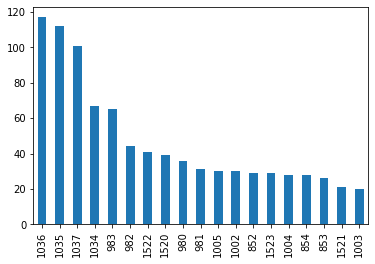

In [72]:
# Apresentar os mesmo dados mais de forma grafica
base_geral["LojaID"].value_counts(ascending=False).plot.bar() # Para esta etapa estamos utilizando a biblioteca plotlib

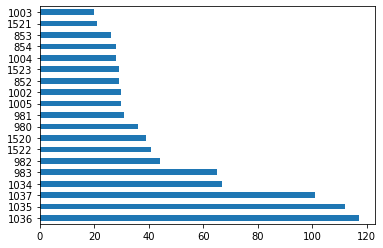

In [73]:
# Vamos altear o tipo de grafico de barra vertical para horizontal
base_geral["LojaID"].value_counts(ascending=False).plot.barh() # A diferença para o codigo acima é que incluimos o h para inverter a barra

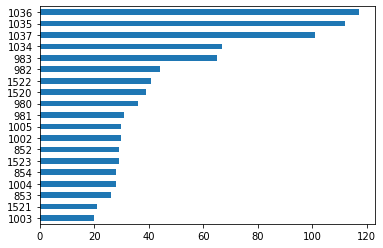

In [75]:
# Vamos alterar a ordem das barras
base_geral["LojaID"].value_counts(ascending=True).plot.barh(); # Invertemos a ordenação de False para True. Colocamos ";" no final para eliminar a linha com titulo da biblioteca

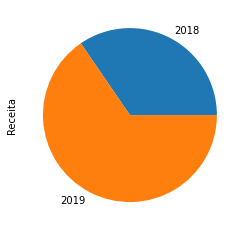

In [78]:
# Vamos inserir grafico de Pizza
base_geral.groupby(base_geral["Data"].dt.year)["Receita"].sum().plot.pie(); # Realizado o agrupamento do anos e somada as receita dos mesmo

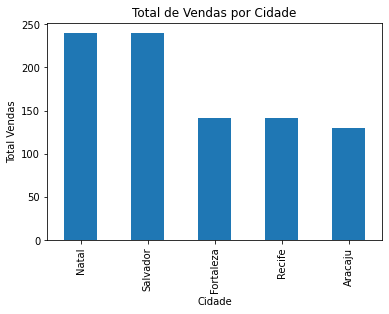

In [86]:
# Formantando o grafico e adicionando informações no mesmo
base_geral["Cidade"].value_counts().plot.bar(title = "Total de Vendas por Cidade"); # acrescenta um titulo ao grafico
plotagem.xlabel ("Cidade") # Acrescenta titulo ao eixo X
plotagem.ylabel ("Total Vendas"); # Acrescenta titulo ao eixo Y

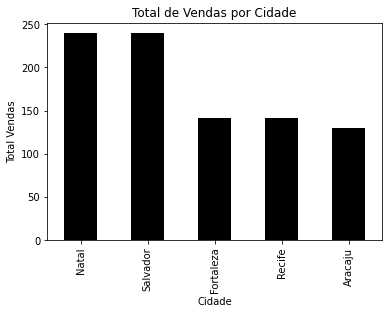

In [85]:
# Alterar a cor do Grafico
base_geral["Cidade"].value_counts().plot.bar(title = "Total de Vendas por Cidade", color="black"); # acrescenta um titulo ao grafico
plotagem.xlabel ("Cidade") 
plotagem.ylabel ("Total Vendas");

In [88]:
#Alterando o Estilo do Grafico
plotagem.style.use ("ggplot") #verificar stilos disponiveis na documentação da biblioteca

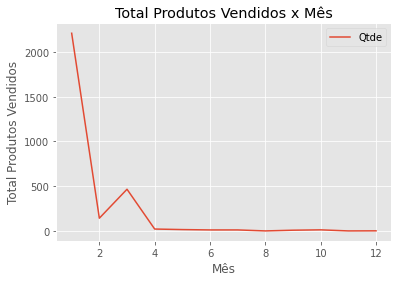

In [97]:
#Inserir grafico de m=vendas com mês com novo estilo aplicado
base_geral.groupby(base_geral["mes_venda"])["Qtde"].sum().plot(title = "Total Produtos Vendidos x Mês")
plotagem.xlabel("Mês")
plotagem.ylabel("Total Produtos Vendidos")
plotagem.legend(); #insere a legenda no grafico

In [100]:
# Selecionando as vendas de 2019
base_2019 = base_geral[base_geral["Ano_venda"] == 2019]

In [102]:
#vendas 2019 por mês
base_2019.groupby (base_2019["mes_venda"])["Qtde"].sum()

mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

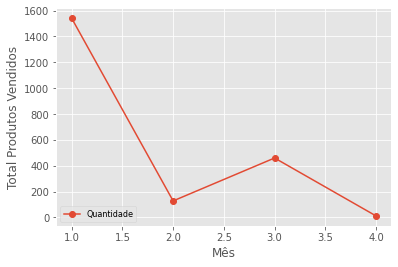

In [106]:
#Grafico de quantidade de vendas por mês
base_2019.groupby (base_2019["mes_venda"])["Qtde"].sum().plot(marker = "o")
plotagem.xlabel ("Mês")
plotagem.ylabel ("Total Produtos Vendidos")
plotagem.legend (["Quantidade"], loc="lower left", fontsize="8");

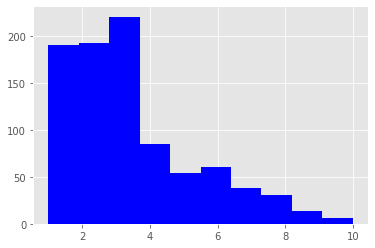

In [112]:
# inserindo histograma
plotagem.hist(base_geral["Qtde"], color = "blue");

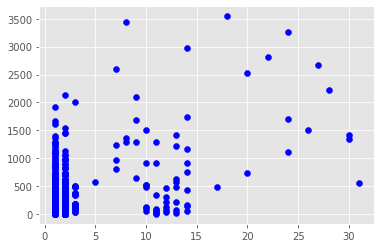

In [115]:
# Inserindo Grafico de disperção
plotagem.scatter(x=base_2019["Dia_Venda"], y = base_2019["Receita"], color="blue");

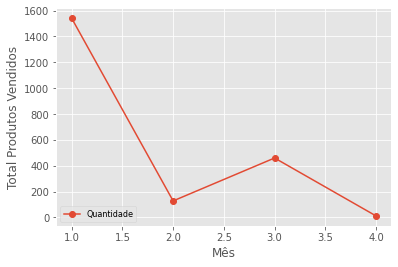

In [116]:
# Vamos gera o grafico e salvar em .png
base_2019.groupby (base_2019["mes_venda"])["Qtde"].sum().plot(marker = "o")
plotagem.xlabel ("Mês")
plotagem.ylabel ("Total Produtos Vendidos")
plotagem.legend (["Quantidade"], loc="lower left", fontsize="8");
plotagem.savefig("Grafico_qtdexmes.png")